# Lab 2 - Vision por computadora

## 1. Explicar Hit or Miss

## 2. Trabajar con rice.jpg

In [1]:
from skimage.filters.thresholding import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.measure import label, regionprops
from PIL import Image
import cv2 as cv

 a) Binarizar la imagen mediante el método de Otsu, o usando algún otro método no local.

131


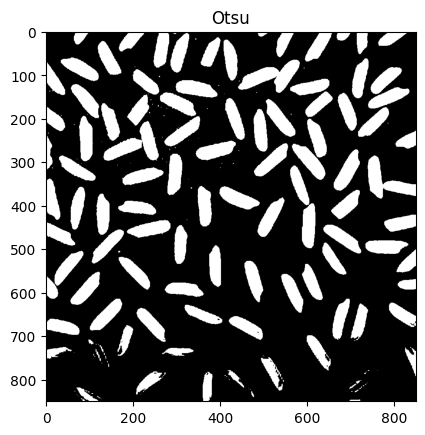

In [2]:
# Lectura imagen
rice = plt.imread('photos/rice.jpg')
rice = ski.color.rgb2gray(rice[:,:,:3])
# Conversion imagen 8
rice = (rice * 255).astype(np.uint8)
# Obtencion del threshold de Otsu
otsuTh = threshold_otsu(rice, 255)
print(otsuTh)
# Binarización de la imagen mediante Otsu
riceWithTh = 255 * ( rice >= otsuTh ).astype(np.uint8)
# Display de la imagen binarizada
plt.title("Otsu")
plt.imshow(riceWithTh, cmap='gray', vmin=0, vmax=255)
plt.show()

 b) Aplicar operaciones morfológicas adecuadas para limpiar el ruido de la binarización. Explicar porqué está eligiendo estas transformaciones morfológicas.

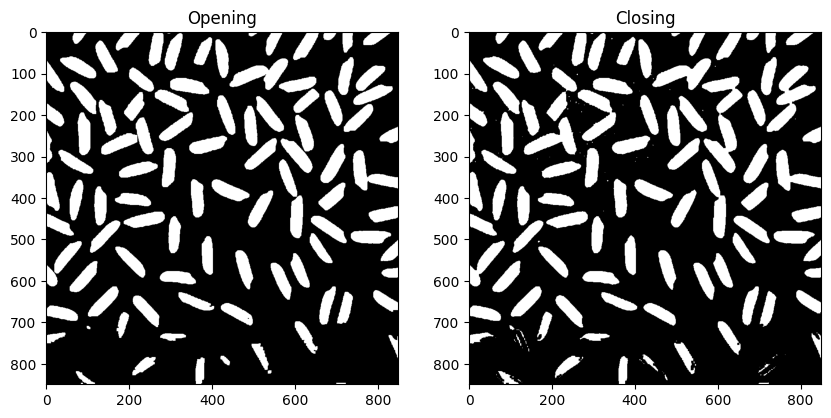

In [3]:
kernel = np.ones((5, 5), np.uint8)  # You can adjust the size of the kernel
riceOpening = cv.morphologyEx(riceWithTh, cv.MORPH_OPEN, kernel)
riceClosing = cv.morphologyEx(riceWithTh, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Opening")
plt.imshow(riceOpening, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Closing")
plt.imshow(riceClosing, cmap='gray', vmin=0, vmax=255)
plt.show()

Se aplica un opening porque primero se necesita erosionar para que se elimine el ruido provocado por el threshold de Otsu, de manera que se elimina ese set de puntos que aparece, así mismo, se aplica la dilatación para que los arroces que quedaron se agranden y que sean más claros. Sin embargo, al comparar con closing se puede observar que en el caso del closing mantiene el espectro de todos los arroces aunque puede que cuente demás ya que hay arroces que se dividen mientras que el opening no.

c) Aplicar un algoritmo de componentes conexas sobre la binarización y contar cuántos granos de arroz hay en la imagen.

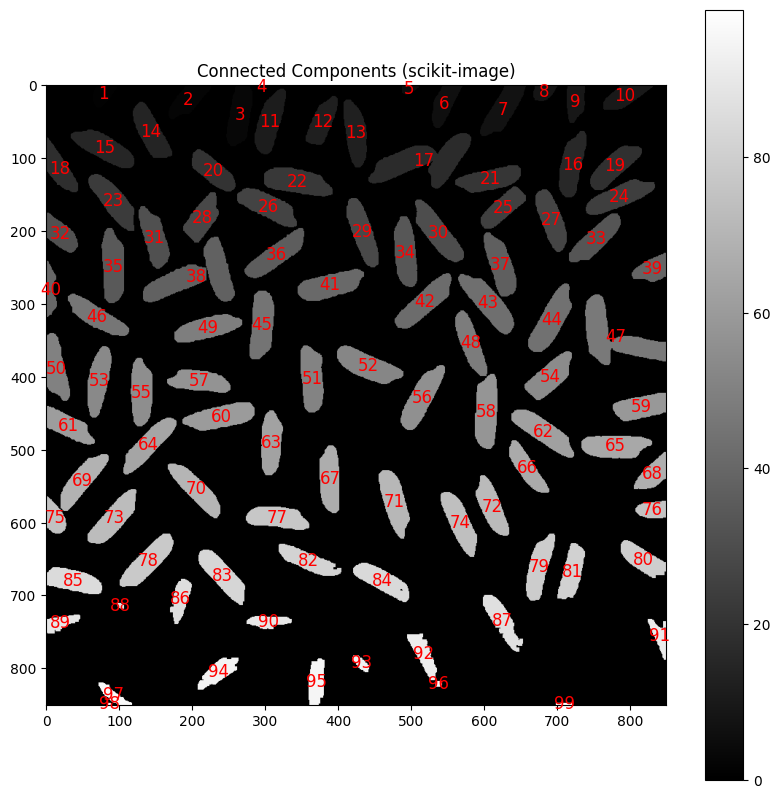

Cantidad de arroces:  99


In [4]:
# Obtener los objetos con una conectividad de 2
labels = label(riceOpening, connectivity=2)
# Obtener las regiones de los objetos
regions = regionprops(labels)
# Visualizar los componentes
plt.figure(figsize=(10, 10))
plt.title("Connected Components (scikit-image)")
plt.imshow(labels, cmap='gray')
# Poner las labels en el mapa
for region in regions:
    centroid = region.centroid
    label_num = region.label
    plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
plt.colorbar()
plt.show()
print("Cantidad de arroces: ", len(regions))

In [5]:
for region in regions:
    print(f"Label: {region.label}, Area: {region.area}, Centroid: {region.centroid}")

Label: 1, Area: 704.0, Centroid: (np.float64(12.436079545454545), np.float64(77.83948863636364))
Label: 2, Area: 1504.0, Centroid: (np.float64(20.12965425531915), np.float64(194.2220744680851))
Label: 3, Area: 2187.0, Centroid: (np.float64(40.924096936442616), np.float64(265.0676726108825))
Label: 4, Area: 61.0, Centroid: (np.float64(2.1475409836065573), np.float64(295.40983606557376))
Label: 5, Area: 226.0, Centroid: (np.float64(4.853982300884955), np.float64(497.2654867256637))
Label: 6, Area: 1392.0, Centroid: (np.float64(25.311063218390803), np.float64(545.7406609195402))
Label: 7, Area: 2174.0, Centroid: (np.float64(33.12603495860166), np.float64(625.7589696412143))
Label: 8, Area: 558.0, Centroid: (np.float64(9.21505376344086), np.float64(681.915770609319))
Label: 9, Area: 1088.0, Centroid: (np.float64(22.264705882352942), np.float64(725.2876838235294))
Label: 10, Area: 1370.0, Centroid: (np.float64(15.051824817518249), np.float64(793.0029197080293))
Label: 11, Area: 2297.0, Cent

## 5. Trabajar con microscope.png

a. Binarizar la imagen (si no está binarizada).

131


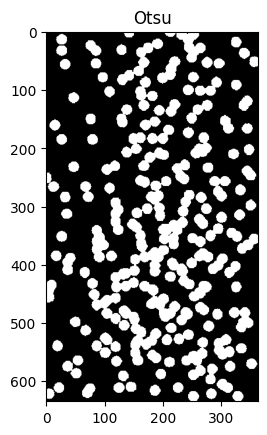

In [6]:
# Lectura imagen
microscope = plt.imread('photos/microscope.png')
microscope = ski.color.rgb2gray(microscope[:,:,:3])
# Conversion imagen 8
microscope = (microscope * 255).astype(np.uint8)
# Obtencion del threshold de Otsu
otsuTh = threshold_otsu(rice, 255)
print(otsuTh)
# Binarización de la imagen mediante Otsu
microscopeWithTh = 255 * ( microscope >= otsuTh ).astype(np.uint8)
# Display de la imagen binarizada
plt.title("Otsu")
plt.imshow(microscopeWithTh, cmap='gray', vmin=0, vmax=255)
plt.show()

b. Obtener la componente conexa de menor tamaño. ¿Cuántos píxeles tiene?

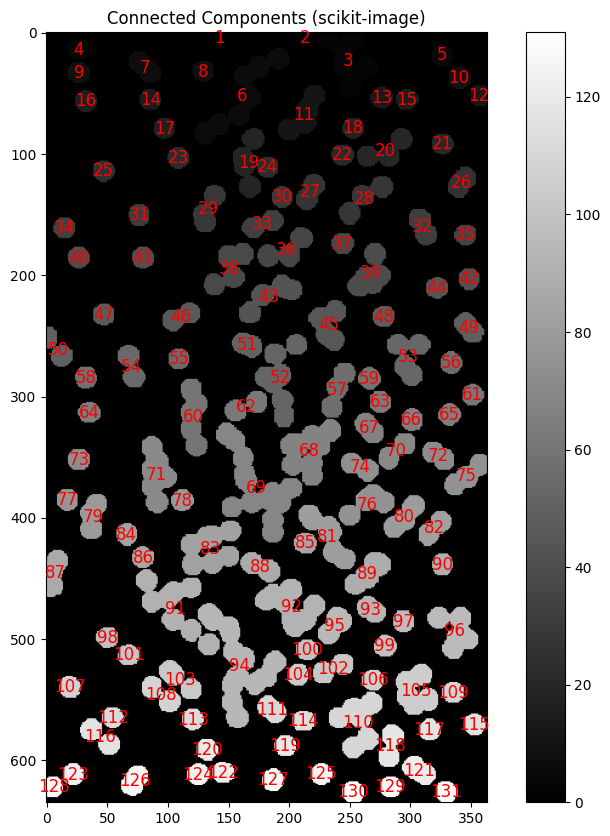

Cantidad de celulas:  131


In [11]:
# Obtener los objetos con una conectividad de 2
labels = label(microscopeOpening, connectivity=2)
# Obtener las regiones de los objetos
regions = regionprops(labels)
# Visualizar los componentes
plt.figure(figsize=(10, 10))
plt.title("Connected Components (scikit-image)")
plt.imshow(labels, cmap='gray')
for region in regions:
    centroid = region.centroid
    label_num = region.label
    plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
plt.colorbar()
plt.show()
print("Cantidad de celulas: ", len(regions))

In [18]:
areas = [region.area for region in regions]
minimumArea = min(areas)
smallestComponent = areas.index(minimumArea)
print(f"La componente de menor tamaño es {smallestComponent} y tiene {minimumArea} pixeles")

La componente de menor tamaño es 1 y tiene 158.0 pixeles


c. Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria
donde solo quede la mayor componente conexa.

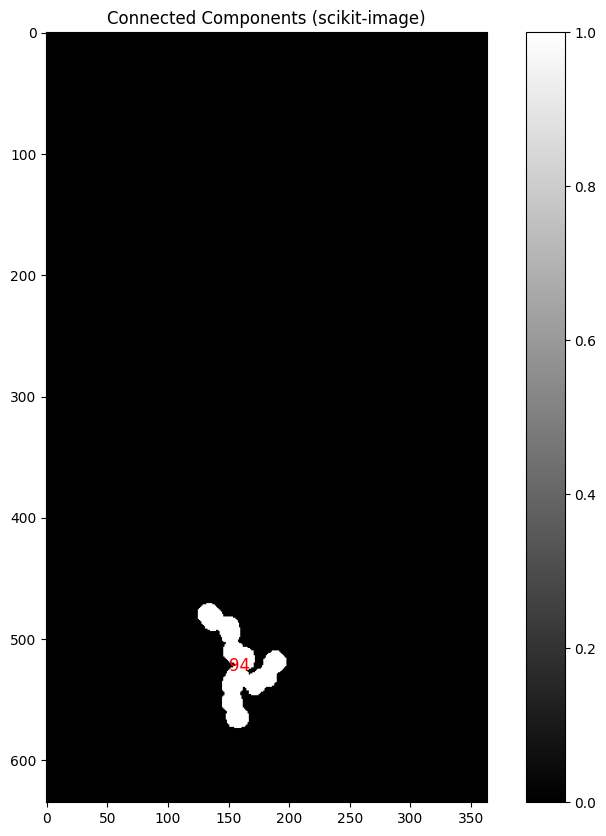

La componente de menor tamaño es 94 y tiene 2603.0 pixeles


In [25]:
biggestArea = max(areas)
biggestComponent = areas.index(biggestArea)
# Crear una máscara binaria que contenga solo el componente más grande
biggestComponentMask = (labels == regions[biggestComponent].label)
plt.figure(figsize=(10, 10))
plt.title("Connected Components (scikit-image)")
plt.imshow(biggestComponentMask, cmap='gray')
centroid = regions[biggestComponent].centroid
label_num = regions[biggestComponent].label
plt.text(centroid[1], centroid[0], str(label_num), color='red', fontsize=12, ha='center', va='center')
plt.colorbar()
plt.show()
print(f"La componente de menor tamaño es {regions[biggestComponent].label} y tiene {biggestArea} pixeles")

d. Aplicar operaciones morfológicas para contar cuántas células hay en total. ¿Comparar el número obtenido contra el
número verdadero de células? ¿Son iguales?